# Rastgele Ne Kadar Rastgele

Sevgili dostum Tevfik Uyarin rastgeleligi anlatirken verdigi ornegi biraz daha ayrintili olrak burada incelemek istiyorum. 

Tevfik sorusuni asagidaki tweeter feedinde soyle aciklamis:

In [1]:
%%html
<blockquote class="twitter-tweet" data-lang="en"><p lang="tr" dir="ltr">Bir yılda ortalama 20 adet uçak kazası gerçekleşiyorsa eğer, tamamen rasgelelik durumunda yılda bir kaç defa art arda (ya da aynı haftada) olabilir. 6 adet denemeye ait bilgi ekte: Grafikte altı denemede 1-365 arasında seçilmiş rasgele 20&#39;şer sayı görünüyor. Değerler diğerinde. <a href="https://t.co/POo5cuXYjE">pic.twitter.com/POo5cuXYjE</a></p>&mdash; Tevfik Uyar (@tevfik_uyar) <a href="https://twitter.com/tevfik_uyar/status/973316792759107584?ref_src=twsrc%5Etfw">March 12, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


Tevfik'in belirtmek istedigi insanlarin rastgelelik algisi ile matematiksel rastgeleligin ortusmeyebilecegi. Matematiksel olarak tamamen rastgele bir diziden secilen sayilarin birbirlerine yakin olmasi insan sezgisine rastgele gibi gelmese bile bu durum matematiksel anlamda gayet normal olabilir. Yukaridaki ornekte 1 ile 365 arasinda ucak kazasi oldugunu varsaydigimiz 20 rastgele sayi seciliyor ve de bazi durumlarda iki sayinin arasindaki fark gercekten de az olabilir. Asagida bu durumu rastgele seriler ureterek aciklamaya calisacagiz. 

### Kisa Matematiksel Referans (Tamamen opsiyonel, tedirgin ederse geciniz)

En unlu olasilik dagilimlarindan bir tanesi de **Poisson** dagilimidir. **Poisson** dagilimi verilen bir $\lambda$ degerine gore (ki burada $\lambda$ ortalama beklentidir) belli bir zaman icerisinde kac tane olayin gerceklesecegini ifade eder. Bir ornekle aciklamak gerekirse:  Ornegin bir lokantaya saatte ortalama 20 musterinin geldigini varsayalim yani $\lambda=20$. Fakat her saatte tam olarak 20 musteri gelmesini beklemeyiz, bazen 15 musteri gelirken bazen 30 musteri de gelebilir, ama uzun zamanda saatte ortalama 20 musteri oldugunu varsayalim.  **Poisson** dagilimi bize hangi olasilikla bir saate 15ten az ya da 30dan fazla musteri gelebilecegini aciklar, ya da belli bir zaman icinde, ornegin 30 dakikada 10 musteri gelme olasiligini verir.

**Poisson** dagilimi bize belli zamanda gelecek musteri sayisini verirken **ustel** dagilim da ardisik iki musteri arasindaki zaman dagilimini verir. 
Ornegimizi dusunecek olursak saate 20 musteri lokandamiza gelmektedir. Bu da ortalama her 3 dakikada bir musterinin gelecegini anlamina gelir. Ancak biliyoruz ki iki musteri arasindaki zamanin uc dakikadan az ya da cok olmasi da olasidir. Bizim ornegimizde saatte 20 musterinin geldigi bir restoranda **Ustel** dagilim iki musteri arasindaki gelme zamanini verecektir. 

Yukarida anlatilanlar kafanizi karistirdiysa korkmayin. Asagida bu durumu matematik olmadan sadece simulasyon yardimiyla cozmeye calisacagiz. Ancak Tevfik'in tanimaldigi problemi tekrarlamak gerekirse:

> ***Bir yil (=365 gun) icerisinde ortalama 20 ucak kazasinin gerceklestigini varsayalim. Iki ucak kazasinin ardarda (ya da cok kisa zaman araligi) icerinde olmasi olasi midir?***

Bu durumda Ucak kazalarini **Poisson** dagilimi olarak modelleyebiliriz. $\lambda=20$.


Poisson dagilimindaki onemli bir kosul gerceklesen olaylarin birbirinden bagimsiz olmasi gerektigidir. Yani ornegimizde bir ucak kazasinin digerini tetiklemedigini kabul ediyoruz. Yani 365 gunluk bir diziden secilen br rakam bir sonraki secilecek sayinin olasiligini herhangi bir sekilde etkilemiyor.  

### Simulasyon Yontemi

Ucak kazasi problemini analitik olarak cozmemiz mumkun ancak burada rastgeleligi daha ayrintili gorebilmek adina simulasyonu tercih edecegim. Simulasyonumuz soyle:

1. 365 gun icinden 20 rastgele sayi sececegiz. Bunlar ucak kazasi olan gunler.
2. Bu 20 gunu kucukten buyuge siraladiktan sonra kazalar arasindaki gun farkini bulacagiz
3. Bunu bircok defa (10000 kez) tekrarlayacagiz. 
4. Elde ettigimiz ucak kazasi gun farki dizisini inceleyecegiz. 

Daha acik olmasi icin bir yil icin ilk iki maddeyi inceleyelim. 

In [2]:
# Simulasyon icin Python dilini, Numpy ve matplotlib kutuphanelerini kullanacagiz.
# bu hucredeki kod bu kutuphaneleri calisma alanimiza yukluyor

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# Bu simulasyonu tekrarlamak isteyenler icin de seed'i bir degere 
#sabitliyorum. (bu satir kafanizi karistirdiysa umursamayin, sadece 
# Pythonun sozde rastgelelik (Psudorandom) ozellgiinden faydalaniyorum)
np.random.seed(0)

365 gun icinden kazanin oldugunu varsaydigimiz rastgele 20 gun secelim

In [3]:
# 365i secmek icin bir fazlasini tavan degeri olarak girmek gerekiyor 
ucak_kazasi_gunleri = np.random.randint(1, 365+1, 20)
ucak_kazasi_gunleri

array([173,  48, 118, 193, 324, 252, 196, 360,  10, 212, 278, 243, 293,
        88,  71,  89, 315, 194,  40,  88])

Kaza gunlerini kucukten buyuge dogru dizelim

In [4]:
ucak_kazasi_gunleri.sort()
ucak_kazasi_gunleri

array([ 10,  40,  48,  71,  88,  88,  89, 118, 173, 193, 194, 196, 212,
       243, 252, 278, 293, 315, 324, 360])

Kazalar arasindaki gun farklarini bulalim

In [5]:
gun_farklari = np.roll(ucak_kazasi_gunleri, shift=-1)[:-1] - ucak_kazasi_gunleri[:-1]
gun_farklari

array([30,  8, 23, 17,  0,  1, 29, 55, 20,  1,  2, 16, 31,  9, 26, 15, 22,
        9, 36])

Yukarida goruldugu uzere rastgele secilen bir sette bir yil icerisinde 3 kazanin iki gun icerisinde (88. ve 89.gunler) oldugunu goruyoruz. Bu durum aslinda kazalarin ardarda olabilecegini bir anlamda gosteriyor. Ancak daha iyi gormek icin 10000 yillik bir kaza simulasyonu gerceklestirelim ve dagilimini inceleyelim.

In [6]:
# burada bir simulasyon fonksiyonu tanimlayacagim 
def kaza_ornekle(baslangic, bitis, frekans, yil_sayisi):
    ucak_kazasi_gunleri = np.random.randint(baslangic, (yil_sayisi*bitis) +1, frekans*yil_sayisi)
    ucak_kazasi_gunleri.sort()
    gun_farklari = np.roll(ucak_kazasi_gunleri, shift=-1)[:-1] - ucak_kazasi_gunleri[:-1]
    return gun_farklari

Ustteki `kaza_ornekle` fonksiyonu onceki asamalarda yaptiklarimizin derli toplu hali olarak dusunulebilir. Yine benzer sonuc aldigimizi gormek icin 20 kazalik ve bir yillik rastgele secimimizi gorelim:

In [7]:
kaza_ornekle(baslangic=1, bitis=365, frekans=20, yil_sayisi=1)

array([47, 16, 11, 16, 32,  0, 18,  9,  3, 20, 46,  0, 22, 20,  3, 45,  2,
        2,  1])

Simdi ise 10000 yillik bir simulasyon olusturalim

In [8]:
kaza_gun_farklari = kaza_ornekle(baslangic=1, bitis=365, frekans=20, yil_sayisi=10000)

Toplamda `9999` ornegimiz var. Tek tek incelemek guc olacagindan histogram uzerinde bakalim  

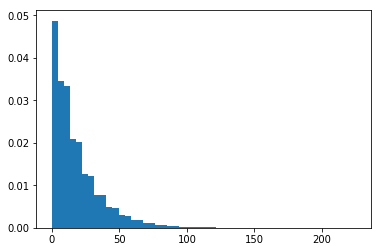

In [9]:
_ = plt.hist(kaza_gun_farklari, bins=50, density=True)

Yukaridaki grafik iki kaza arasindaki gun farkinin bir **Ustel** dagilim oldugunu gosteriyor. Tamamen rastgele ucak kazalari arasindaki gun farkina baktigimizda iki ucak kazasi arasinda bir gun olma olasiligi iki ucak kazasi arasinda 100 gun olma olasiligindan daha fazla oldugunu goruyoruz. Bu da aslinda Tevfikin anlatmak istedigi durumu acikliyor. Yani iki ucak kazasi arasinda bir gun fark olmasi rastgelelikle/tesadufle aciklanabilir. Herhangi bir komploya gerek yok :)

**Ustel** dagilim bize ayrica ortalama iki ucak kazasi arasindaki farkin da $365/\lambda$ gun olmasi gerektigini soyler. Bu durumda 9999 gun araliginin ortalamasinin analitik cozum olan 365/20 = 18.25'e yakin olmasini bekleriz. Bakalim:

In [10]:
print('Iki kaza arasindaki ortalama gun farki {0} gundur'.format(gun_farklari.mean().round(2)))

Iki kaza arasindaki ortalama gun farki 18.42 gundur


Gercekten de simulasyon ile elde ettigimiz deger analitik deger olan 18.25'e cok yakin.

Elimizde empirik veri seti olduguna gore birkac ilginc soru sorabiliriz:
 1. Herhangi iki kaza arasinda 50 gunden az olma olasiligi nedir?
 2. Herhangi iki kaza arasinda 75 gunden fazla olasiligi nedir?
 3. Herhangi iki kaza arasinda 0 ya da 1 gun olma olasiligi nedir?
 4. Kazalarin %90i arasinda en fazla kac gun vardir?


In [11]:
# herhangi iki kaza arasinda 50 gunden az olma olasiligi nedir?
p = np.mean(kaza_gun_farklari < 50).round(2)
print("Herhangi iki kaza arasinda 50 gunden az olma olasiligi %{0}".format(100*p))

Herhangi iki kaza arasinda 50 gunden az olma olasiligi %93.0


In [12]:
# herhangi iki kaza arasinda 75 gunden fazla olma olasiligi nedir?
p = np.mean(kaza_gun_farklari > 75 ).round(3)
print("Herhangi iki kaza arasinda 75 gunden fazla olma olasiligi %{0}".format(100*p))

Herhangi iki kaza arasinda 75 gunden fazla olma olasiligi %1.6


Yukaridaki sonuca gore iki ucak kazasi arasinda 75 gunden fazla olmasinin olasigi %2 den azdir. Ancak bircok insanin algisina gore bu o kadar anormal bir durum degildir. En azindan iki ucak kazasinin ardarda gelmesi kadar anormal bir durum olarak algilanmamaktadir.

In [13]:
# herhangi Iki kaza arasinda 0 ya da 1 gun olma olasiligi nedir?
p = np.mean(kaza_gun_farklari <= 1).round(3)
print("Herhangi iki kaza arasinda 1 gun veya daha az olma olasiligi %{0}".format(100*p))

Herhangi iki kaza arasinda 1 gun veya daha az olma olasiligi %7.9


`%7.9` olasilikla iki kaza ayni gunde ya da bir gun arayla gerceklesebilir. Ilk bakista her ne kadar dusuk bir olasilik gibi gorunse de yillik 20 kazanin oldugunu dusunursek bu oran degisecektir. Daha iyi anlayabilmek icin soruyu soyle soralim. 

> *Iki kazanin arasinda 1 gun ya da az olma olasiliginin %7.9 oldugunu biliyoruz. Yillik ise 20 kaza gerceklesiyor. Bu durumda toplamda bir yil icerisinde (20 kazada) ardarda (bir ya da 0 gun farkla) kaza gormemizin olasiligi nedir?*

$p = 0.079$ iki ardarda kaza olma olasiligi olduguna gore $1-p = 0.921$ de iki ardarda kaza olmama olasiligidir. Bu durumda 19 kaza gunu farkinda, ardarda kaza olmama olasiligi ise:

In [14]:
0.921**19

0.20937892887352805

Yukarida goruldugu uzere 20 kazanin olugu bir yilda ardarda iki kaza **olmama** olasiligi ~%21 . Yani 20 kaza icinde ardarda iki kaza **olma** olasiligi ise %79 . Bu ise yabana atilir bir olasilik degil. Hatta ardarda kaza olma olasiligi 2 yil icinde de %96'ya cikiyor: !!

In [15]:
1 - 0.921**39

0.959623787476416

In [16]:
# Kazalarin %90i arasinda en fazla kac gun vardir?
print("Kazalarin %90'i {:.0f} gun icerisinde gerceklesir".format(np.percentile(kaza_gun_farklari, 90)))

Kazalarin %90'i 42 gun icerisinde gerceklesir


Her ne kadar komplo teorileri ya da astrologlarin yildiz ay fallari boyle durumlarda daha inandirici geliyor gibi olsa da durun ve sorun. Acaba rastgelelik/tesaduf bu durumu aciklayabilir mi? Eger veriye dayali bir varsayimla yola cikarsaniz, sonucta elle tutulur bir sonuc elde edersiniz.

Bu arada astrolojiyle ilgili de ufak bir sey ekleyeyim. Newtonun kutlecekim kanunu yan dairenizde oturan sisman komsunuzun size uyguladigi kutlecekim cekim kuvvetinin Neptunun, Jupiterin, Venusun vs.. toplamda size uyguladigindan daha fazla oldugunu soyler. Astrologlar gezegenlere bakarak size birseyler anlatiyorsa gidin komsunuza da akil danisin, en azindan istatistiksel olarak komsunuz astrologlara gore daha cok yanilmayacaktir:)   


### Daha az ucak kazasi olursa dagilim degisimi nasil olur?

Elimizdeki `kaza_ornekle` fonksiyonu bircok sorulari sorabilmemizi mumkun kildigina gore yillik ucak kazasi frekansini degistirirsek dagilimimiz nasil degisecektir? Yillik kaza sayisini 20den 5'e indirelim: $\lambda=5$ 

In [17]:
kaza_gun_farklari = kaza_ornekle(baslangic=1, bitis=365, frekans=5, yil_sayisi=10000)

Iki kaza arasindaki ortalama gun farkinin 365/5 = 73 gun olmasini bekleriz. Bakalim:

In [18]:
kaza_gun_farklari.mean()

72.99895997919958

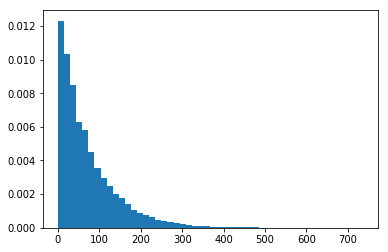

In [19]:
_ = plt.hist(kaza_gun_farklari, bins=50, density=True)

Yukaridaki grafik her ne kadar frekansin 20 oldugu grafige benzese de `x` ekseninin degerlerine dikkatli bakiniz. Bu durumda
1. Herhangi iki kaza arasinda 50 gunden az olma olasiligi nedir
2. Herhangi iki kaza arasinda 75 gunden fazla olasiligi nedir
3. Herhangi iki kaza arasinda 0 ya da 1 gun olma olasiligi nedir?
4. Kazalarin %90i arasinda en fazla kac gun vardir?

In [20]:
# herhangi iki kaza arasinda 50 gunden az olma olasiligi nedir?
p = np.mean(kaza_gun_farklari < 50).round(2)
print("Herhangi iki kaza arasinda 50 gunden az olma olasiligi %{0}".format(100*p))

Herhangi iki kaza arasinda 50 gunden az olma olasiligi %49.0


In [21]:
# herhangi iki kaza arasinda 75 gunden fazlaolma olasiligi nedir?
p = np.mean(kaza_gun_farklari > 75 ).round(3)
print("Herhangi iki kaza arasinda 75 gunden fazla olma olasiligi %{0}".format(100*p))

Herhangi iki kaza arasinda 75 gunden fazla olma olasiligi %35.5


In [22]:
# Herhangi iki kaza arasinda 0 ya da 1 gun olma olasiligi nedir?
p = np.mean(kaza_gun_farklari <= 1).round(3)
print("Herhangi iki kaza arasinda 1 gun veya daha az olma olasiligi %{0}".format(100*p))

Herhangi iki kaza arasinda 1 gun veya daha az olma olasiligi %2.0


In [23]:
# Bir yil icerisinde ardarda iki kaza olma olasiligi nedir:
p = 1-0.98**4
print("Bir yil icerisinde olan 5 kazadan herhangi ikisnin ardarda gerceklesme olasiligi %{:.1f}".format(100*p))

Bir yil icerisinde olan 5 kazadan herhangi ikisnin ardarda gerceklesme olasiligi %7.8


In [24]:
# Kazalarin %90i arasinda en fazla kac gun vardir?
np.percentile(kaza_gun_farklari, 90)

168.0

Yillik kaza ortalamasi 20'den 5'e dustugunde ardarda kaza olma olasiligi da `%79`'dan `%7.8`'e iniyor. Eger yilda ortalama 5 kaza olsaydi o zaman iki kazanin ardarda gelmesi daha ilginc bir olay olurdu. 

-------
## Mehmet Oner Yalcin  
#### Mart 2018
#### [@oneryalcin](https://twitter.com/oneryalcin)